<h2 style="text-align: center;">Analysis of Unemployment in the S&P 500</h2>

<p style="text-align: center;">Aiden Hu, Elsa George, Nathan Mitchell, Shreya Pradhan </p>

___

## Introduction

The focus of this project is exploring the impact of federal funds rates, inflation rates (Consumer Price Index), performance of the S&amp;P 500, and Gross Domestic Product (GDP) on unemployment rates. In the process, we will walk through the entire data science pipeline from start to finish. This topic is important because there is currently a lot of instability in the job market. Many companies are laying off significant amounts of employees. We seek to give people insight as to what is going on right now and what we can expect for the foreseeable future in times of norm.

Background:
The unemployment rate is the share of people in the labor force that don’t have a job but are currently
looking for one. This rate is calculated by dividing the number of unemployed job seekers in the labor force by the sum of employed and unemployed job seekers. 

More about unemployment rates can be found here:
https://www.epi.org/newsroom/useful_definitions/

The federal funds rate is the interest rate on loans by banks and other financial institutions in accounts
at the Federal Reserve Banks. The Federal raises or lowers the funds rate in accordance with trends in
the market. If the economy is growing at a slow pace or unemployment is rising, the Fed may lower the
funds rate to make borrowing cheaper and to stimulate more economic growth. In a situation where
there is economic growth but inflation is rising too high, the Fed could raise the rate, which would
reduce investment and economic growth. 

More about the federal funds rate can be found at: https://www.epi.org/newsroom/useful_definitions/
The Consumer Price Index is the average change over time in the prices paid by urban consumers for
consumer goods and services.

More information can be found here: https://www.bls.gov/cpi/

The S&amp;P 500 GDP. 
    
We will be walking through Data science lifecycle as follows:

1. Data Collection
2. Data Processing
3. Exploratory Data Analysis & Data Visualization
4. Model: Analysis, Hypothesis Testing, & ML
5. Interpretation: Insight & Policy Decision

The only additional external libraries we will be using is yfinance and google-colab-selenium. Run the commands below only once (uncomment to run) then restart the kernel.

In [68]:
# pip install yfinance

In [69]:
# %pip install google-colab-selenium #(Google Collab ONLY)

In [70]:
# Imports
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import MultipleLocator
import seaborn as sns

###########################################
# Google Collab Imports
# import google_colab_selenium as gs
# from google.colab import drive
###########################################

###########################################
# Comment out this section if using Google Collab
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
###########################################



## Data Collection

- 1. Unemployment Rate
- 2. Interest Rates
- 3. Inflation Rates
- 4. S&P 500 Company List
- 5. S&P 500 Closing Stock Prices
- 6. GDP and Real GDP

Before we begin, please download the following csv files and place them in the same directory on your computer as this Jupyter Notebook. Give them the corresponding names.
- Unemployment Rates : https://fred.stlouisfed.org/series/UNRATE
    - "unemployment_rates.csv"
- Federal Funds Effective Rate (Interest Rate indicator) : https://fred.stlouisfed.org/series/FEDFUNDS
    - "FEDFUNDS.csv"
- Median Consumer Price Index (Inflation Rate indicator) : https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE
    - "med_cpi.csv"
- Gross Domestic Product : https://fred.stlouisfed.org/graph/?g=oCZ#0
    - "GDP.csv"
- Real Gross Domestic Product : https://fred.stlouisfed.org/series/GDPC1
    - "real_GDP.csv"

Websites to webscrape:
- S&P500 Company List (with industry) : https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
- S&P500 Stock Prices : https://finance.yahoo.com/quote/%5EGSPC/history/?period1=1514764800&period2=1712348922&frequency=1mo&guccounter=1

For all FRED and Yahoo links, select the time period 2018-01-01 to 2024-04-01 before downloading the CSV.

In this project, we will be focusing on the time period from January 1, 2018 to May 1, 2024 which is reflective of the period preceding and subsequent to the peak of unemployment during COVID-19 in April 2020 which allows to analyze our variables in times of both peace and crisis in hopes that it will better shape our understanding of how these factors impact unemployment rates.

### 1. Reading Unemployment Rates from CSV

Our unemployment rate here represents overall unemployment across all industries.

In [71]:
# (Google Collab ONLY)
# drive.mount('/content/drive')
# unrate_df = pd.read_csv('/content/drive/My Drive/unemployment_rates.csv')
# unrate_df.head()

In [72]:
# NOTE: unrate = unemployment rate
unrate_df = pd.read_csv('unemployment_rates.csv')
unrate_df.head()

,DATE,UNRATE
0,2018-01-01,4.0
1,2018-02-01,4.1
2,2018-03-01,4.0
3,2018-04-01,4.0
4,2018-05-01,3.8


### 2. Reading Interest Rates (Federal Funds Effective Rate) from CSV

"The term federal funds rate refers to the target interest rate range set by the Federal Open Market Committee (FOMC). This target is the rate at which commercial banks borrow and lend their excess reserves to each other overnight."

We will be using Federal Funds Effective Rate as our macro indicator for interest rate.

Learn more here:
<a href="https://fred.stlouisfed.org/series/FEDFUNDS">Federal Funds Effective Rate (Scroll down)</a>

In [73]:
# (Google Collab ONLY)
# interest_rate_df = pd.read_csv('/content/drive/My Drive/FEDFUNDS.csv')
# interest_rate_df.head()

In [74]:
interest_rate_df = pd.read_csv('FEDFUNDS.csv')
interest_rate_df

,DATE,FEDFUNDS
0,2018-01-01,1.41
1,2018-02-01,1.42
2,2018-03-01,1.51
3,2018-04-01,1.69
4,2018-05-01,1.70
...,...,...
71,2023-12-01,5.33
72,2024-01-01,5.33
73,2024-02-01,5.33
74,2024-03-01,5.33


### 3. Reading Inflation Rate (Median Consumer Price Index) from CSV

"The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services."

We will be using the Median Consumer Price Index as our macro indicator for inflation rate.

Learn more here: <a href="https://www.bls.gov/cpi/"> Consumer Price Index </a>

In [75]:
# (Google Collab ONLY)
# inflation_rate_df = pd.read_csv('/content/drive/My Drive/med_cpi.csv')
# inflation_rate_df.head()

In [76]:
inflation_rate_df = pd.read_csv('med_cpi.csv')
inflation_rate_df.head()

,DATE,MEDCPIM158SFRBCLE
0,2018-01-01,4.170000
1,2018-02-01,2.013279
2,2018-03-01,1.961900
3,2018-04-01,2.932009
4,2018-05-01,2.981833


### 4. Web Scraping Wikipedia S&P Company List Data

This is a nice list of all the S&P500 companies containing useful miscellaneous information that we will make use of later on in sector analysis.

In [77]:
sp_wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp_wiki_df_list = pd.read_html(sp_wiki_url)
sp500_df = sp_wiki_df_list[0]
sp500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### 5. Webscraping S&P500 stock prices from Yahoo Finance

In the code below, we get the data from Yahoo finance directly from the website using Selenium and chrome driver. We read the data as html and create a dataframe for the data specified data.

The specified data in the code below are the S&P 500 monthly values.

In [ ]:
# 1. SCRAPE data from website

url = "https://finance.yahoo.com/quote/%5EGSPC/history/?period1=1514764800&period2=1712348922&frequency=1mo&guccounter=1"

########################
# (Google Collab ONLY)
# driver = gs.Chrome()

# Other
driver = webdriver.Chrome()

########################
driver.get(url)

soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find("table")


# Extracting table rows
rows = []
for row in table.find_all('tr')[1:]:
    row_data = [val.text.replace(',', '') for val in row.find_all('td')]
    rows.append(row_data)

# Creating DataFrame
sp500_stocks_df = pd.DataFrame(rows, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj. Close', 'Volume'])
sp500_stocks_df['Date'] = pd.to_datetime(sp500_stocks_df['Date'])
sp500_stocks_df['Open'] = pd.to_numeric(sp500_stocks_df['Open'], errors='coerce')
sp500_stocks_df['High'] = pd.to_numeric(sp500_stocks_df['High'], errors='coerce')
sp500_stocks_df['Low'] = pd.to_numeric(sp500_stocks_df['Low'], errors='coerce')
sp500_stocks_df['Close'] = pd.to_numeric(sp500_stocks_df['Close'], errors='coerce')
sp500_stocks_df['Adj. Close'] = pd.to_numeric(sp500_stocks_df['Adj. Close'], errors='coerce')
sp500_stocks_df['Volume'] = pd.to_numeric(sp500_stocks_df['Volume'], errors='coerce')

# Close broswer window
driver.quit()

sp500_stocks_df.head()

### 6. Reading GDP and Real GDP from CSV

GDP stands for Gross Domestic Product. It represents the total monetary value of all finished goods and services produced within a country's borders in a specific time period. As a broad measure of overall domestic product, it serves as an indicator of a given country's economic health.

Real GDP stands for Real Gross Domestic Product and is basically just GDP adjusted for inflation. Economists commonly use real GDP to determine the rate at which an economy is growing without any of the distorting effects of inflation.

Notice both our dataframes will represent GDP quarterly.

Learn more here: <a href="https://www.investopedia.com/terms/g/gdp.asp#:~:text=Gross%20domestic%20product%20(GDP)%20is,a%20given%20country%27s%20economic%20health.">GDP</a>

In [ ]:
# (Google Collab ONLY)
# gdp_df = pd.read_csv('/content/drive/My Drive/GDP.csv')
# gdp_df.head()

In [ ]:
gdp_df = pd.read_csv('GDP.csv')
gdp_df.head()

In [ ]:
# (Google Collab ONLY)
# real_gdp_df = pd.read_csv('/content/drive/My Drive/real_GDP.csv')
# real_gdp_df.head()

In [27]:
real_gdp_df = pd.read_csv('real_GDP.csv')
real_gdp_df.head()

,DATE,GDPC1
0,2018-01-01,20044.077
1,2018-04-01,20150.476
2,2018-07-01,20276.154
3,2018-10-01,20304.874
4,2019-01-01,20415.150


## Data Processing

1. Unemployment Rate
2. Interest Rates
3. Inflation Rates
4. S&P 500 Company List
5. S&P 500 Stock Prices
6. GDP & Real GDP

In this section, we seek to process our data in a way that makes sure it is complete and in a suitable format for analysis. For this, we will make use of Pandas and Numpy, two libraries commonly used for data processsing.

Learn more here:
- Pandas: https://pandas.pydata.org/
- Numpy: https://numpy.org/

### Cleaning Unemployment Rate Data

Let's take a look at our unrate dataframe and also check our data types to make sure they are in a format suitable for analysis.

In [28]:
unrate_df

,DATE,UNRATE
0,2018-01-01,4.0
1,2018-02-01,4.1
2,2018-03-01,4.0
3,2018-04-01,4.0
4,2018-05-01,3.8
...,...,...
71,2023-12-01,3.7
72,2024-01-01,3.7
73,2024-02-01,3.9
74,2024-03-01,3.8


In [29]:
unrate_df.dtypes

DATE       object
UNRATE    float64
dtype: object

DATE is a time and thus should be converted to a datetime object. UNRATE as a float is fine.

In [30]:
unrate_df['DATE'] = pd.to_datetime(unrate_df['DATE'])
unrate_df.dtypes

DATE      datetime64[ns]
UNRATE           float64
dtype: object

There isn't really much to clean up here, we are good to move on, unrate_df is ready.

### Cleaning Interest Rates Data

Let's take a look at our federal funds effective rate.

In [31]:
print(interest_rate_df.dtypes)
interest_rate_df

DATE         object
FEDFUNDS    float64
dtype: object


,DATE,FEDFUNDS
0,2018-01-01,1.41
1,2018-02-01,1.42
2,2018-03-01,1.51
3,2018-04-01,1.69
4,2018-05-01,1.70
...,...,...
71,2023-12-01,5.33
72,2024-01-01,5.33
73,2024-02-01,5.33
74,2024-03-01,5.33


Here we should convert DATE into datetime and also rename FEDFUNDS to "interest_rate" as it serves as our macro indicator for interest rate.

In [32]:
interest_rate_df['DATE'] = pd.to_datetime(interest_rate_df['DATE'])
interest_rate_df = interest_rate_df.rename(columns={'FEDFUNDS':'interest_rate'})
display(interest_rate_df)

,DATE,interest_rate
0,2018-01-01,1.41
1,2018-02-01,1.42
2,2018-03-01,1.51
3,2018-04-01,1.69
4,2018-05-01,1.70
...,...,...
71,2023-12-01,5.33
72,2024-01-01,5.33
73,2024-02-01,5.33
74,2024-03-01,5.33


In [33]:
interest_rate_df.dtypes

DATE             datetime64[ns]
interest_rate           float64
dtype: object

With that our interest rate data is ready.

### Cleaning Inflation Rates Data

Let's take a look at our inflation rates data frame now.

In [34]:
print(inflation_rate_df.dtypes)
inflation_rate_df

DATE                  object
MEDCPIM158SFRBCLE    float64
dtype: object


,DATE,MEDCPIM158SFRBCLE
0,2018-01-01,4.170000
1,2018-02-01,2.013279
2,2018-03-01,1.961900
3,2018-04-01,2.932009
4,2018-05-01,2.981833
...,...,...
71,2023-12-01,4.160125
72,2024-01-01,6.542477
73,2024-02-01,4.558160
74,2024-03-01,4.327346


We notice again our date is of type object, a common theme... Also, since the second column represents median consumer price index which is our macro indicator for inflation rate, let's rename it to inflation rate.

In [35]:
inflation_rate_df['DATE'] = pd.to_datetime(inflation_rate_df['DATE'])
inflation_rate_df.rename(columns={'MEDCPIM158SFRBCLE':'inflation_rate'}, inplace=True)

In [36]:
print(inflation_rate_df.dtypes)
inflation_rate_df.head()

DATE              datetime64[ns]
inflation_rate           float64
dtype: object


,DATE,inflation_rate
0,2018-01-01,4.170000
1,2018-02-01,2.013279
2,2018-03-01,1.961900
3,2018-04-01,2.932009
4,2018-05-01,2.981833


With that our inflation rates data is ready.

### Cleaning S&P500 Company List Data

Now let's take a look at our sp500 dataframe.

In [37]:
sp500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


Let's drop the columns that we will not be using.

In [38]:
del_col = ['Security','GICS Sub-Industry','Headquarters Location', 'Date added','CIK','Founded']
sp500_df.drop(del_col, inplace=True, axis=1)
print("Companies with their symbols and sector: \n")
sp500_df.head()

Companies with their symbols and sector: 



,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


### Cleaning S&P500 Stock Prices Data

Now let's take a look at our S&P500 stock prices dataframe.

In [39]:
print(sp500_stocks_df.dtypes)
sp500_stocks_df.head()

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj. Close           float64
Volume                 int64
dtype: object


,Date,Open,High,Low,Close,Adj. Close,Volume
0,2024-04-01,5257.97,5263.95,4953.56,5035.69,5035.69,81747170000
1,2024-03-01,5098.51,5264.85,5056.82,5254.35,5254.35,86299510000
2,2024-02-01,4861.11,5111.06,4853.52,5096.27,5096.27,82066930000
3,2024-01-01,4745.20,4931.09,4682.11,4845.65,4845.65,81737880000
4,2023-12-01,4559.43,4793.30,4546.50,4769.83,4769.83,81530670000


We only want to deal with data we are using and thus will drop any columns we will not be using from here onward.

In [40]:
# Drop all columns other than Date, Open, Close, Volume
sp500_stocks_df.drop(columns={'High', 'Low', 'Adj. Close'}, inplace=True)
sp500_stocks_df.head()

,Date,Open,Close,Volume
0,2024-04-01,5257.97,5035.69,81747170000
1,2024-03-01,5098.51,5254.35,86299510000
2,2024-02-01,4861.11,5096.27,82066930000
3,2024-01-01,4745.20,4845.65,81737880000
4,2023-12-01,4559.43,4769.83,81530670000


Notice that our dates are not in sorted order from earliest to latest. Let's fix that.

In [41]:
sp500_stocks_df.sort_values(by='Date', inplace=True)
sp500_stocks_df.head()

,Date,Open,Close,Volume
75,2018-01-01,2683.73,2823.81,77318690000
74,2018-02-01,2816.45,2713.83,79933970000
73,2018-03-01,2715.22,2640.87,76803890000
72,2018-04-01,2633.45,2648.05,70194700000
71,2018-05-01,2642.96,2705.27,76011820000


One more thing to take into account however is that we will want a main dataframe of sorts later on to make analysis between variables easier. To merge all our dataframes together, it would be helpful to have a common key that the dataframes can merge on. We have chose date in our case as it is common amongst all our datasets. To make this dataframe compatible, we should rename "date" to "DATE" so that it matches up with our other dataframes.

In [42]:
sp500_stocks_df.rename(columns={'Date':'DATE'}, inplace=True)
sp500_stocks_df.head()

,DATE,Open,Close,Volume
75,2018-01-01,2683.73,2823.81,77318690000
74,2018-02-01,2816.45,2713.83,79933970000
73,2018-03-01,2715.22,2640.87,76803890000
72,2018-04-01,2633.45,2648.05,70194700000
71,2018-05-01,2642.96,2705.27,76011820000


Here, we decided to create another column containing the Exponential Moving Average of our Close Price and took 30 data points (or 30 days) to calculate the average. With that, this dataframe is ready for analysis.

Learn more here: <a href="https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp#:~:text=Exponential%20moving%20averages%20(EMAs)%20are,simple%20moving%20average%20(SMA).">Exponential Moving Average</a>

With that, this dataframe is ready for analysis.

### Cleaning GDP and Real GDP Dataframes

From our download, we know that both the GDP and Real GDP dataframes are in sorted order by date. The first thing to check then is that they have matching shapes as they should cover the same time period given that the only difference between the two is one is adjusted for inflation.

In [43]:
print('GDP Shape: ', gdp_df.shape)
print('Real GDP Shape: ', real_gdp_df.shape)

GDP Shape:  (25, 2)
Real GDP Shape:  (25, 2)


Okay so we are good here. Now let's take a look at our GDP dataframe first.

In [44]:
print(gdp_df.dtypes)
display(gdp_df)

DATE     object
GDP     float64
dtype: object


,DATE,GDP
0,2018-01-01,20328.553
1,2018-04-01,20580.912
2,2018-07-01,20798.730
3,2018-10-01,20917.867
4,2019-01-01,21104.133
5,2019-04-01,21384.775
6,2019-07-01,21694.282
7,2019-10-01,21902.390
8,2020-01-01,21706.513
9,2020-04-01,19913.143


Looking at this dataframe, we have most of our work cut out for us. GDP is already a float, the only thing to change is DATE. Right now it is of type object; since it is a time, we should reformat it to datetime.

In [45]:
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df.dtypes

DATE    datetime64[ns]
GDP            float64
dtype: object

Okay we are all good here now. Now let's move onto our Real GDP dataframe.

In [46]:
print(real_gdp_df.dtypes)
real_gdp_df.head()

DATE      object
GDPC1    float64
dtype: object


,DATE,GDPC1
0,2018-01-01,20044.077
1,2018-04-01,20150.476
2,2018-07-01,20276.154
3,2018-10-01,20304.874
4,2019-01-01,20415.150


We have the same issue with date as we did with gdp_df so we will change that accordingly. Additionally, we should rename GDPC1 to something more easily understandable. In this case, we know it represents real GDP so we will change it to that.

In [47]:
real_gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
print(real_gdp_df.dtypes)

DATE     datetime64[ns]
GDPC1           float64
dtype: object


In [48]:
real_gdp_df.rename(columns={'GDPC1':'real_GDP'}, inplace=True)
real_gdp_df.head()

,DATE,real_GDP
0,2018-01-01,20044.077
1,2018-04-01,20150.476
2,2018-07-01,20276.154
3,2018-10-01,20304.874
4,2019-01-01,20415.150


One more thing we notice is that in both gdp_df and real_gdp_df, our dates only go up to January 2024 which does not match up with our time frame of January 1, 2018 - May 1, 2024. As of doing this project, we are in May. If we take a look at the investopedia article below, we will see that we are still in Q2 meaning we won't have the data from Jan 1 and onward until Q2 ends in late June. We will take this into consideration when interpolating our monthly values.

Learn more about fiscal quarters here: <a href="https://www.investopedia.com/terms/q/quarter.asp">Fiscal Quarters Explained</a>

### Interpolating data for GDP and Real GDP Dataframes

Now that our data is clean, we can address another issue before we continue on to the next section. Currently both of our GDP dataframes represent GDP in quarters or every 3 months. If we want to explore any relationships between GDP and other variables, having aligned time intervals would be helpful in identifying these relationships when visualizing data. Notice that our other variables operate on a monthly time interval. How can we find our monthly GDP and real GDP? Oftentimes, in real life we will encounter missing data or information that we want to know but we don't know. There are 3 main types of missing data that is expanded upon in the article below but to fast forward, we are dealing with Missing Not at Random data because we know that GDP is purposefully measured quarterly. Hope is not lost however, because we can impute this missing data via interpolation which is basically determining a value based on existing values in the dataset. In this case, what we can do is find the daily rate for both GDP and real GDP and then extract the monthly rate from that. This will help give us a more accurate read on what our monthly GDP values are. Now let's define what we need to do.

Tasks:
- Use the starting quarter and ending quarter dates to generate the missing dates in between for both dataframes using Pandas
- Use the starting quarter GDP + ending quarter GDP + days in between to figure out what our daily rate of change is and use that to interpolate values for the days in between quarters.
- Use information from our daily rates to extract what the monthly values are for GDP and real GDP

$$ \text{Daily Rate} = \frac{\text{Quarterly GDP End} - \text{Quarterly GDP Start}}{\text{Number of Days in Quarter}} $$

Learn more here: <a href="https://www.ncbi.nlm.nih.gov/books/NBK493614/">Types of Missing Data</a>

In [49]:
# Function for interpolating dates in between a specified start and end date
def dates_in_between(start_date, end_date):
    # Convert to strings
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = end_date.strftime("%Y-%m-%d")
    # Generate a range of dates from start_date to end_date inclusive
    date_range = pd.date_range(start=start_date_str, end=end_date_str)

    return list(date_range)

# Function for calculating daily rate
def get_daily_rate(Q_end, Q_start, num_days):
    numerator = Q_end - Q_start
    return (numerator / num_days)

In [50]:
# Calculate gdps, real_gdps, dates for DAILY time interval
gdps = []
real_gdps = []
dates = []

for i in range(len(real_gdp_df['DATE']) - 1):
    # Dates are same in gdp_df and real_gdp_df
    start_date = real_gdp_df['DATE'][i]
    end_date = real_gdp_df['DATE'][i + 1]

    # Get the filler dates
    filler_dates = dates_in_between(start_date, end_date)

    for date in filler_dates:
        dates.append(date)

    # Calculate daily rates
    num_days = len(filler_dates)

    # GDP calculation
    Q_end_gdp = gdp_df[gdp_df['DATE'] == end_date]['GDP'].values[0]
    Q_start_gdp = gdp_df[gdp_df['DATE'] == start_date]['GDP'].values[0]
    gdp_dr = get_daily_rate(Q_end_gdp, Q_start_gdp, num_days)

    # Real GDP calculation
    Q_end_real_gdp = real_gdp_df[real_gdp_df['DATE'] == end_date]['real_GDP'].values[0]
    Q_start_real_gdp = real_gdp_df[real_gdp_df['DATE'] == start_date]['real_GDP'].values[0]
    real_gdp_dr = get_daily_rate(Q_end_real_gdp, Q_start_real_gdp, num_days)

    # Populate daily GDPs
    for j in range(num_days):
        gdp_qstart = gdp_df[gdp_df['DATE'] == start_date]['GDP'].values[0]
        gdp_val = gdp_qstart + (gdp_dr * j)
        gdps.append(gdp_val)

        real_gdp_qstart = real_gdp_df[real_gdp_df['DATE'] == start_date]['real_GDP'].values[0]
        real_gdps.append(real_gdp_qstart + (real_gdp_dr * j))

In [51]:
# Check lengths are all the same before creating new dataframe
print(len(dates))
print(len(gdps))
print(len(real_gdps))

2215
2215
2215


In [52]:
# Create new dataframe containg Date : GDP : Real GDP for DAILY time intervals
daily_gdps_df = pd.DataFrame({
    'DATE': dates,
    'GDP': gdps,
    'real_GDP': real_gdps
})

In [53]:
# Make sure there are no duplicate dates, if there are, keep the first instance, handles overlapping date generation
daily_gdps_df.drop_duplicates(subset='DATE', keep='first', inplace=True)

Okay, now that we have calculated our daily values, let's use this dataframe to extract the values for a monthly time interval.

In [54]:
# Extract gdps for MONTHLY interval

# Get the first of every month in our date range
monthly_gdps_df = daily_gdps_df[daily_gdps_df['DATE'].dt.is_month_start]

monthly_gdps_df.head()

,DATE,GDP,real_GDP
0,2018-01-01,20328.553000,20044.077000
31,2018-02-01,20414.521451,20080.322813
59,2018-03-01,20492.170374,20113.060967
90,2018-04-01,20578.138824,20149.306780
121,2018-05-01,20651.939609,20191.457957


### Imputing for February, March, April 2024 GDP and Real GDP

Since Q2 has not ended yet, our GDP data only goes up to 2024-01-01. Since all our other data goes up to 2024-04-01. We want to impute our GDP values such that they match up to the general trend of the current data. To do so, we will take the slope of the two most recent months and add that to each new data point to impute the next 3 months. It could be that something major occurs in the next 3 months that drastically impacts Q2 GDP but it is not something that we know since the data has not been released yet so aligning ourselves with the current trend is the safest course of action.

In [55]:
# Take slope of GDP
gdp_last2 = monthly_gdps_df['GDP'].values[-2:]
y1 = gdp_last2[0]
y2 = gdp_last2[1]

# Rise = y2 - y1, Run = 1
slope_gdp = y2 - y1

# Take slope of real GDP
real_gdp_last2 = monthly_gdps_df['real_GDP'].values[-2:]
y1r = real_gdp_last2[0]
y2r = real_gdp_last2[1]

slope_real_gdp = y2r - y1r

# Get next 3 values
GDP3 = y2 + slope_gdp
rGDP3 = y2r + slope_real_gdp

# Create dataframe for Feb, March, April 2024 GDP and Real GDP
extra_dates = pd.DataFrame({'DATE': ['2024-02-01 00:00:00', '2024-03-01 00:00:00', '2024-04-01 00:00:00']})
extra_GDP = pd.DataFrame({'GDP': [GDP3, GDP3, GDP3]})
extra_real_GDP = pd.DataFrame({'real_GDP': [rGDP3, rGDP3, rGDP3]})
extra_df = pd.concat([extra_dates, extra_GDP, extra_real_GDP], axis=1)

print(extra_df.dtypes)
print(extra_df.shape)
extra_df

DATE         object
GDP         float64
real_GDP    float64
dtype: object
(3, 3)


,DATE,GDP,real_GDP
0,2024-02-01 00:00:00,28390.143161,22797.772774
1,2024-03-01 00:00:00,28390.143161,22797.772774
2,2024-04-01 00:00:00,28390.143161,22797.772774


In [56]:
# convert to datetime
extra_df['DATE'] = pd.to_datetime(extra_df['DATE'])

Now we add these extra dates onto interpolated data from 2018-01-01 to 2024-01-01 to complete our GDP dataframe.

In [57]:
monthly_gdps_df = pd.concat([monthly_gdps_df, extra_df], axis=0)
print(monthly_gdps_df.dtypes)
print(monthly_gdps_df.shape)
monthly_gdps_df.tail()

DATE        datetime64[ns]
GDP                float64
real_GDP           float64
dtype: object
(76, 3)


,DATE,GDP,real_GDP
2183,2023-12-01,28171.809828,22738.032108
2214,2024-01-01,28280.976495,22767.902441
0,2024-02-01,28390.143161,22797.772774
1,2024-03-01,28390.143161,22797.772774
2,2024-04-01,28390.143161,22797.772774


With this, our dataframe is ready for use.

### Congregating our dataframes into a main dataframe

The next step would be to congregate all our data into a main dataframe so we can limit the referencing of multiple different dataframes and instead focus on one main one as we move forward in the pipeline.

Task:
- Merge the following dataframes into one
    - unrate_df
    - interest_rate_df
    - monthly_gdps_df
    - sp500_stocks_df
    - inflation_rate_df

Let's check that we have a matching number of rows before we merge together.

In [58]:
print(unrate_df.shape)
print(interest_rate_df.shape)
print(monthly_gdps_df.shape)
print(sp500_stocks_df.shape)
print(inflation_rate_df.shape)

(76, 2)
(76, 2)
(76, 3)
(76, 4)
(76, 2)


Since all our dataframes up to this point contain a DATE, we can use this as our common key when merging our dataframes together.

In [59]:
# Merge all dataframes into main dataframe

merge_1 = pd.merge(unrate_df, interest_rate_df, on='DATE', how='outer')
merge_2 = pd.merge(monthly_gdps_df, sp500_stocks_df, on='DATE', how='outer')
merge_3 = pd.merge(inflation_rate_df, merge_2, on='DATE', how='outer')
main_df = pd.merge(merge_1, merge_3, on='DATE', how='outer')

In [60]:
main_df.head(10)

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume
0,2018-01-01,4.0,1.41,4.170000,20328.553000,20044.077000,2683.73,2823.81,77318690000
1,2018-02-01,4.1,1.42,2.013279,20414.521451,20080.322813,2816.45,2713.83,79933970000
2,2018-03-01,4.0,1.51,1.961900,20492.170374,20113.060967,2715.22,2640.87,76803890000
3,2018-04-01,4.0,1.69,2.932009,20578.138824,20149.306780,2633.45,2648.05,70194700000
4,2018-05-01,3.8,1.70,2.981833,20651.939609,20191.457957,2642.96,2705.27,76011820000
5,2018-06-01,4.0,1.82,2.632118,20725.334804,20233.805978,2718.70,2718.37,77891360000
6,2018-07-01,3.8,1.91,2.111494,20796.362413,20274.787935,2704.95,2816.29,64898300000
7,2018-08-01,3.8,1.91,2.296711,20838.442333,20285.727333,2821.17,2901.52,69523070000
8,2018-09-01,3.7,1.95,2.333723,20878.154667,20295.300667,2896.96,2913.98,63031510000
9,2018-10-01,3.8,2.19,2.606263,20916.585957,20304.565183,2926.29,2711.74,91930980000


Let's check that all our variables are the of the right data type.

In [61]:
print(main_df.dtypes)

DATE              datetime64[ns]
UNRATE                   float64
interest_rate            float64
inflation_rate           float64
GDP                      float64
real_GDP                 float64
Open                     float64
Close                    float64
Volume                     int64
dtype: object


Everything looks good. Next, let's check for NaN values in our dataset before moving forward and deal with them accordingly.

In [62]:
# Check for all rows containing NaN values
nan_rows = main_df[main_df.isna().any(axis=1)]
nan_rows

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume


Okay, it looks like we don't have any NaN values so we are good here.

In [63]:
unrate_df.tail()

,DATE,UNRATE
71,2023-12-01,3.7
72,2024-01-01,3.7
73,2024-02-01,3.9
74,2024-03-01,3.8
75,2024-04-01,3.9


In [64]:
print(main_df.shape)
print(main_df.dtypes)

(76, 9)
DATE              datetime64[ns]
UNRATE                   float64
interest_rate            float64
inflation_rate           float64
GDP                      float64
real_GDP                 float64
Open                     float64
Close                    float64
Volume                     int64
dtype: object


In [65]:
main_df

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume
0,2018-01-01,4.0,1.41,4.170000,20328.553000,20044.077000,2683.73,2823.81,77318690000
1,2018-02-01,4.1,1.42,2.013279,20414.521451,20080.322813,2816.45,2713.83,79933970000
2,2018-03-01,4.0,1.51,1.961900,20492.170374,20113.060967,2715.22,2640.87,76803890000
3,2018-04-01,4.0,1.69,2.932009,20578.138824,20149.306780,2633.45,2648.05,70194700000
4,2018-05-01,3.8,1.70,2.981833,20651.939609,20191.457957,2642.96,2705.27,76011820000
...,...,...,...,...,...,...,...,...,...
71,2023-12-01,3.7,5.33,4.160125,28171.809828,22738.032108,4559.43,4769.83,81530670000
72,2024-01-01,3.7,5.33,6.542477,28280.976495,22767.902441,4745.20,4845.65,81737880000
73,2024-02-01,3.9,5.33,4.558160,28390.143161,22797.772774,4861.11,5096.27,82066930000
74,2024-03-01,3.8,5.33,4.327346,28390.143161,22797.772774,5098.51,5254.35,86299510000


With that, let's start exploring!

## Exploratory Data Analysis & Data Visualization

TODO

Intro here...

In this section we seek to explore the relationships between our variables and unemployment rate so that we may find which of these are good indicators for unemployment rate and use these indicators to build a model that will forecast future unemployment in times of norm.

Libraries used and links...

We will be working with two main dataframes here:
- sector_df
- main_df

In [ ]:
# 

### Plotting Closing Price (EMA) against Unemployment Rate

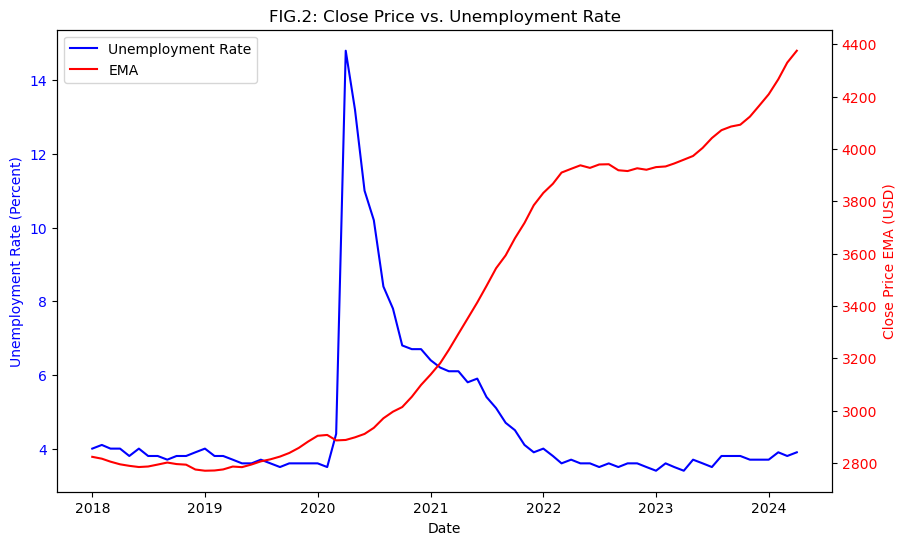

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(main_df['DATE'], main_df['UNRATE'], label='Unemployment Rate', color='blue')
ax1.set_ylabel('Unemployment Rate (Percent)', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(main_df['DATE'], main_df['Close_EMA2'], label='EMA', color='red')
ax2.set_ylabel('Close Price EMA (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('FIG.2: Close Price vs. Unemployment Rate')
plt.show()

### Plotting Inflation Rate against Unemployment Rate

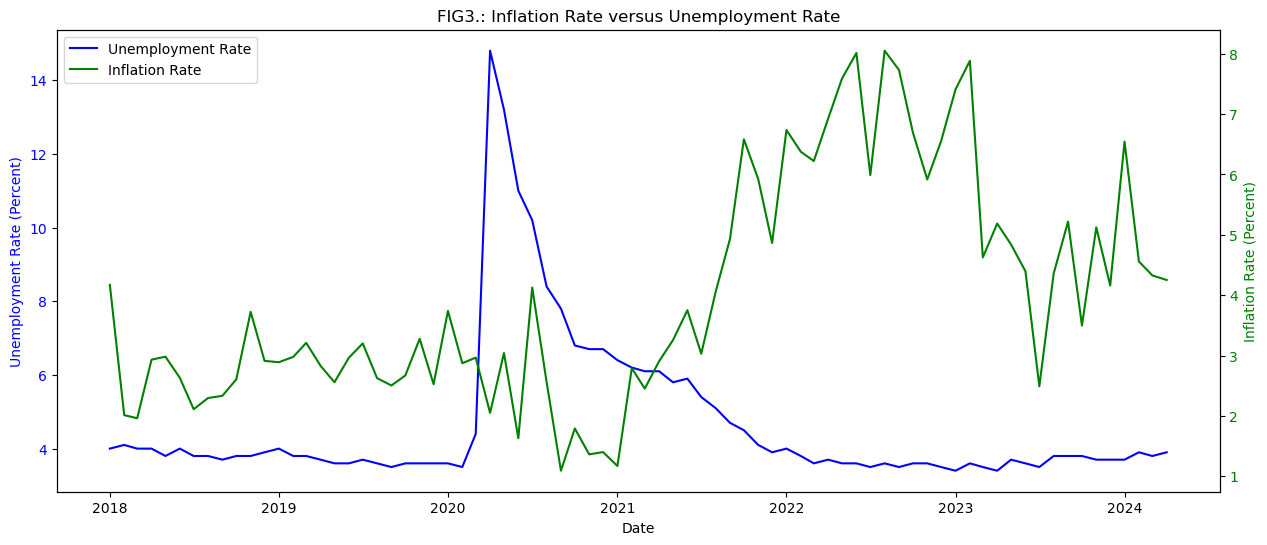

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(main_df['DATE'], main_df['UNRATE'], label='Unemployment Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (Percent)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(main_df['DATE'], main_df['inflation_rate'], label='Inflation Rate', color='green')
ax2.set_ylabel('Inflation Rate (Percent)', color='green')
ax2.tick_params(axis='y', labelcolor='green')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('FIG3.: Inflation Rate versus Unemployment Rate')

plt.show()

### Plotting Interest Rate against Unemployment Rate

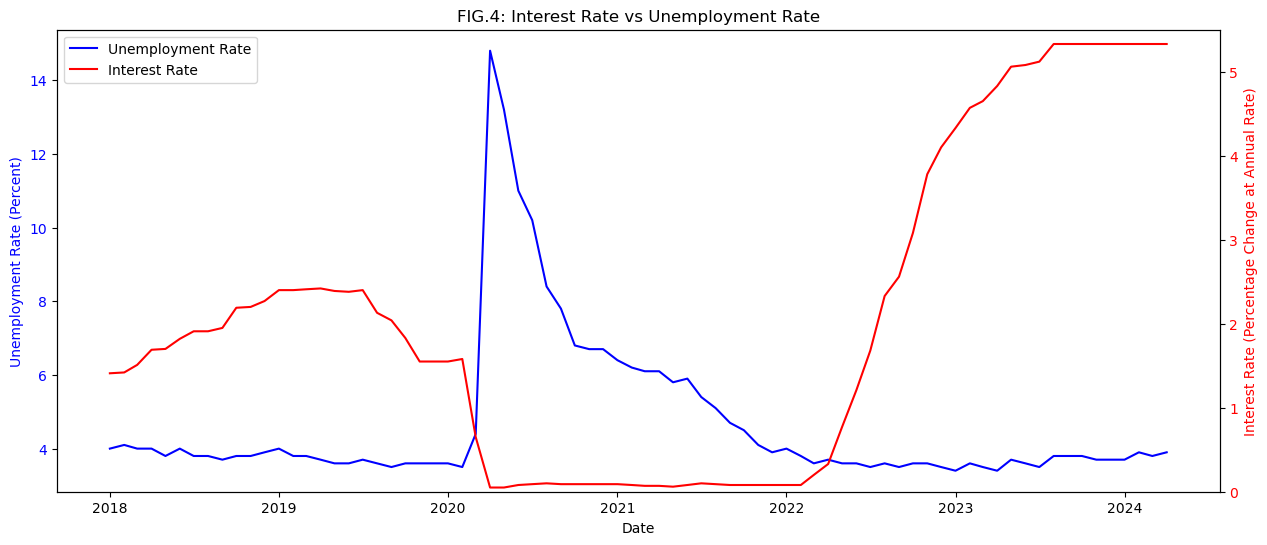

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(main_df['DATE'], main_df['UNRATE'], label='Unemployment Rate', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (Percent)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(main_df['DATE'], main_df['interest_rate'], label='Interest Rate', color='red')
ax2.set_ylabel('Interest Rate (Percentage Change at Annual Rate)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.yaxis.set_major_locator(MultipleLocator(base=1))
ax2.set_ylim(0, 5.5)  # Adjust the upper limit as needed
ax2.set_ylim(bottom=0)  # Set the lower limit to 0

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('FIG.4: Interest Rate vs Unemployment Rate')

plt.show()



---


##Sector Analysis
###Rate of Returns for S&P 500:

Here, we are calculating the rate of return for S&P 500. This will later be compared with each sectors' rate of return to track their performance.




---

Below, we are calculating the monthly rate of return using the formula:  
 $RoR = (Close - Open)/Open$


  
We use data beginning from the month of January 2018 to April 2024. We create a DataFrame and add the Rate of Return for each month to the DataFram

In [9]:
# Calculte rate of return for monthly data
print("\nS&P500 Monthly Rate of Return: \n")
rate_of_return = ((sp500_stocks_df['Close'] - sp500_stocks_df['Open']) / sp500_stocks_df['Open']) * 100

# Create a new DataFrame with 'Date' and 'Rate of Return' columns
monthly_RoR = pd.DataFrame({'Date': sp500_stocks_df['Date'], 'Monthly RoR (%)': rate_of_return})

# Sort values based on Date
monthly_RoR = monthly_RoR.sort_values(by='Date', ascending=False)
monthly_RoR.head()


S&P500 Monthly Rate of Return: 



,Date,Monthly RoR (%)
0,2024-04-01,-4.227487
1,2024-03-01,3.056579
2,2024-02-01,4.837578
3,2024-01-01,2.116876
4,2023-12-01,4.614612




---
### Plotting:
Plot monthly rate of return:


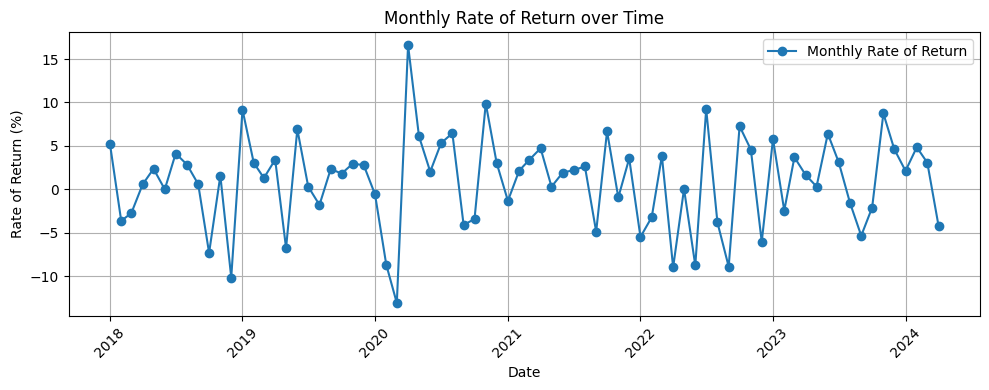

In [10]:
plt.figure(figsize=(10, 4))

# Plot monthly data
plt.plot(monthly_RoR['Date'], monthly_RoR['Monthly RoR (%)'],  marker='o', label='Monthly Rate of Return')

# Customize the plot
plt.title('Monthly Rate of Return over Time')
plt.xlabel('Date')
plt.ylabel('Rate of Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

Here we see that during March of 2020, the rate of return from S&P 500 decreased significantly. During 2020, as a result of COVID, the Stock market did not perform so well in the beginning and the economy was doing poorly. But in a month (by April of 2020), the rate of return increased drastically going from about -14% up to about 16%. However, since then, the rate of return has decreased again and has been fluctuating between -10% to 10%.

In [11]:

# Define start and end dates for data retrieval
start_date = '2018-01-01'
end_date = '2024-04-01'

# Dictionary to store historical stock data for each symbol
stock_data = {}

# Loop through S&P 500 symbols
for sym in sp500_df['Symbol']:
  try:

    # BRK.B and BF.B did not work so, trying with BRK-B and BF-B
    if sym == 'BRK.B':
      sym = 'BRK-B'
    elif sym == 'BF.B':
        sym = 'BF-B'

    # Retrieve historical stock data using yfinance
    data = yf.download(sym, start=start_date, end=end_date)
    data.index = pd.to_datetime(data.index)

    # Resample the data since we want the monthly data and not daily data
      # Open   : starting price of the month => the first value
      # Close  : ending price of the month => last value
      # Volume : sum of the all values in the month

    monthly_data = data.resample('M').agg({
            'Open': 'first',
            'Close': 'last',
            'Volume': 'sum'
        })

    monthly_data['Symbol'] = sym

    monthly_data.reset_index(inplace=True)
    stock_data[sym] = monthly_data

  except Exception as e:
    print(f"Failed to retrieve data for {sym}: {e}")

# Check data retrieval success
if stock_data:

  # Create a new dataframe
  stock = pd.concat(stock_data.values(), ignore_index=True)

else:
  print("No data retrieved")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******



---

The code below checks if we lost any data by comparing the number of companies in the S&P 500 from the website vs. the companies that we received the data for.
Then, we print the first 5 lines of the data we gathered from the website.

In [24]:
# Display the DataFrame
unique_sym = stock['Symbol'].nunique()
print("Num companies in S&P 500: ", sp500_df.shape[0])
print("Num companies data retrieved for: ", unique_sym, "\n\n")

stock.head()

Num companies in S&P 500:  503
Num companies data retrieved for:  501 




,Date,Open,Close,Volume,Symbol,Rate of Return
0,2018-01-31,197.140472,209.448166,58718577.0,MMM,6.243108
1,2018-02-28,206.889633,196.914719,69860035.0,MMM,-4.821370
2,2018-03-31,197.449829,183.545151,66565652.0,MMM,-7.042132
3,2018-04-30,182.316055,162.533447,80606692.0,MMM,-10.850722
4,2018-05-31,162.232437,164.908020,77731747.0,MMM,1.649228




---

When getting the data for the values of each company, there were 2 companies for which we were unable to get data for within the specified range. The companies are GEV and SOLV. Although GEV is one of the largest companies for Utilities sector, since it was only founded after 2024-04-01. Since we are using time frame of 2018-01-01 to 2024-04-01, we will not include it in our calculation. There may be slight errors because this might introduce some bias, but that is okay. As for SOLV, since the company was also only founded after 2024-04-01, we will not include them in our calculation. However, for SOLV, we do not have it worry about it introducing a bias and causing large errors with our calculation as it's not one of the biggest contributors to it's sector.

In [25]:
# Make sure date is in datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

# Set 'Date' column as the index
stock.set_index('Date', inplace=True)
print(stock.dtypes)

Open              float64
Close             float64
Volume            float64
Symbol             object
Rate of Return    float64
dtype: object




---
The code below adds a new column called Rate of Return to the stock dataframe and then calculates the monthly rate of return by the stock using the formula:
$((Close - Open) / Open) * 100$


In [26]:
# Calculate the rate of return
stock['Rate of Return'] = ((stock['Close'] - stock['Open'])/stock['Open'])*100

# reset index so we have a 'Date' column
stock.reset_index(inplace=True)
stock.head()


,Date,Open,Close,Volume,Symbol,Rate of Return
0,2018-01-31,197.140472,209.448166,58718577.0,MMM,6.243108
1,2018-02-28,206.889633,196.914719,69860035.0,MMM,-4.821370
2,2018-03-31,197.449829,183.545151,66565652.0,MMM,-7.042132
3,2018-04-30,182.316055,162.533447,80606692.0,MMM,-10.850722
4,2018-05-31,162.232437,164.908020,77731747.0,MMM,1.649228




---

Merge the stock data with the sectors data based on symbol. Here we perform inner join on Symbol. This way, we have the each stock, their data (including symbol), and which sector the stock belongs to.

In [27]:
merge_df = pd.merge(sp500_df, stock, on='Symbol', how='left')
merge_df.head()

,Symbol,GICS Sector,Date,Open,Close,Volume,Rate of Return
0,MMM,Industrials,2018-01-31,197.140472,209.448166,58718577.0,6.243108
1,MMM,Industrials,2018-02-28,206.889633,196.914719,69860035.0,-4.821370
2,MMM,Industrials,2018-03-31,197.449829,183.545151,66565652.0,-7.042132
3,MMM,Industrials,2018-04-30,182.316055,162.533447,80606692.0,-10.850722
4,MMM,Industrials,2018-05-31,162.232437,164.908020,77731747.0,1.649228




---

The code below calculates the weighted average rate of return for each sector and puts it in a new DataFrame.

In [28]:
# Group the DataFrame by 'Date' and 'GICS Sector'
# Calculate the weighted average rate of return by sector
merge_df = merge_df.groupby(['Date', 'GICS Sector']).apply(
    lambda x: (x['Rate of Return'] * x['Volume']).sum() / x['Volume'].sum()
).reset_index(name='Weighted Sector RoR')

# Print the data
merge_df.head()


,Date,GICS Sector,Weighted Sector RoR
0,2018-01-31,Communication Services,6.999093
1,2018-01-31,Consumer Discretionary,8.429619
2,2018-01-31,Consumer Staples,3.747389
3,2018-01-31,Energy,2.931156
4,2018-01-31,Financials,6.119940




---

Since the data is not in the format that we want, we transpose the data so that each sector is a column and the rate of return of each sector on the specified dates are the rows.

In [29]:
sector_data = merge_df.pivot(index='Date', columns='GICS Sector', values='Weighted Sector RoR')
sector_data.head()

GICS Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2018-01-31,6.999093,8.429619,3.747389,2.931156,6.119940,6.758801,2.171763,9.484459,2.882444,-2.080966,-1.219092
2018-02-28,-5.827696,-0.921554,-8.449417,-13.118919,-2.493036,-3.665709,-4.010498,2.940391,-4.174980,-7.219171,-4.249145
2018-03-31,-5.599475,-7.214861,-2.317419,1.256408,-5.028562,-1.940618,-1.474165,-3.734396,-4.979875,2.887933,4.216498
2018-04-30,-0.510192,7.367393,-2.974015,9.779639,0.351286,0.678875,-2.390294,-1.073062,-3.161163,0.480016,2.337134
2018-05-31,2.556354,1.242210,-2.946282,5.253924,-0.718509,0.689261,4.044154,10.484732,4.789331,3.517634,0.024876


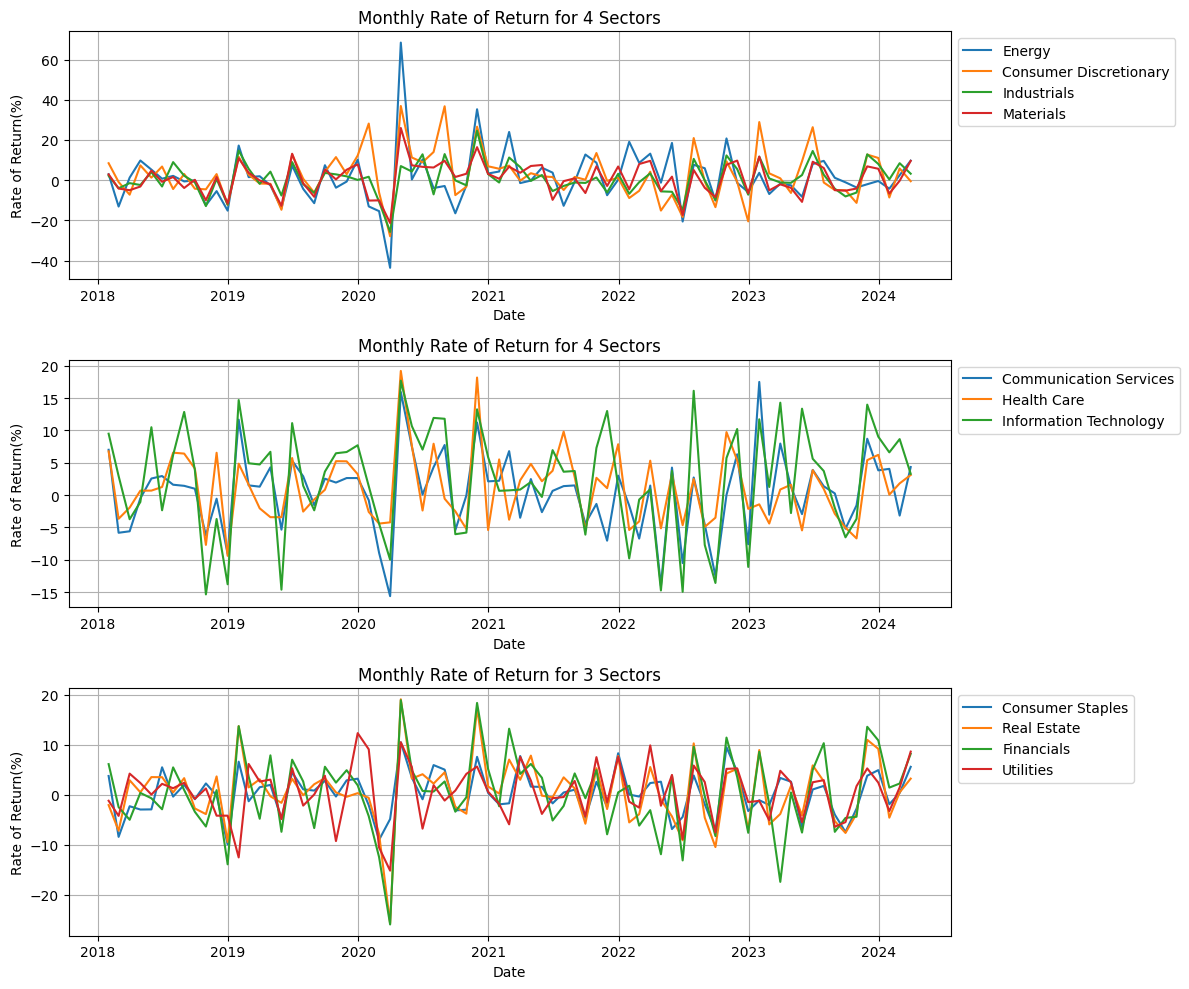

In [30]:
# Plot the data
fig, axs = plt.subplots(3, figsize=(12, 10))


# specify columns for the first plot
cols_plot1 = ['Energy', 'Consumer Discretionary', 'Industrials', 'Materials']

# specify columns for the second plot
cols_plot2 = ['Communication Services',	'Health Care', 'Information Technology']

cols_plot3 = ['Consumer Staples', 'Real Estate', 'Financials', 'Utilities']

# Plot first subplot with 5 sectors
axs[0].set_title('Monthly Rate of Return for 4 Sectors')
for column in cols_plot1:
  axs[0].plot(sector_data.index, sector_data[column], label=column)

# Plot second subplot with 6 sectors
axs[1].set_title('Monthly Rate of Return for 4 Sectors')
for column in cols_plot2:
  axs[1].plot(sector_data.index, sector_data[column], label=column)


# Plot second subplot with 6 sectors
axs[2].set_title('Monthly Rate of Return for 3 Sectors')
for column in cols_plot3:
  axs[2].plot(sector_data.index, sector_data[column], label=column)

# Set common things
for ax in axs:
  ax.set_xlabel('Date')
  ax.set_ylabel('Rate of Return(%)')
  ax.grid(True)

# Add legend
axs[0].legend(bbox_to_anchor=(1, 1))
axs[1].legend(bbox_to_anchor=(1, 1))
axs[2].legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

According to the graph above, the rate of returns for each sector tend to fluctutate quite heavily every month. Most of the sectors also seem to fluctuate in the same direction. What I mean by this is that most of the sectors see an increase or a decrease in the rate of return at the same time. It is simply a question of by how much. While some sector only vary a little bit others could have a massive change for a time period. Then, it could be the other way around for a different time period. At certain times, some sectors seem to be doing much better as compared to other sectors.


From the graph, we can conclude that there is no such thing as a "stable" sector after looking at how much the rate of return varies on a month-to-month basis.

However, the rate of return for all sectors increased significantly after April (which is right after when the sS&P 500 saw the significant increase in it's rate of return). When, we compare all the sectors against each other, in April of 2020 (when the rate of return for all sectors increased), there was still a sector which increased even more drastically when compared to others which was the Energy sector. While the other sectors were increased and their rate of return was up to 20% ~ 40%, the rate of return for the energy sector was about 60%, which is higher than any other sectors by about 40% ~ 20%.



---



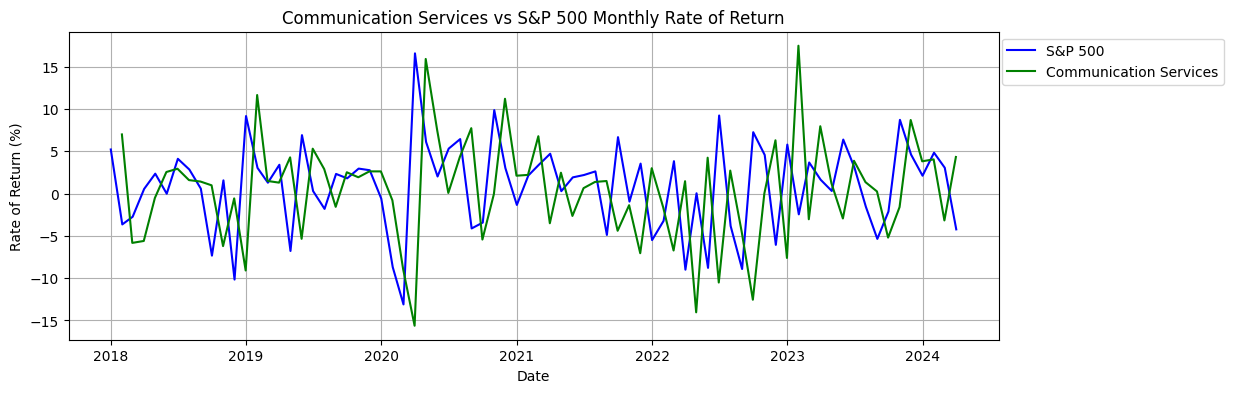

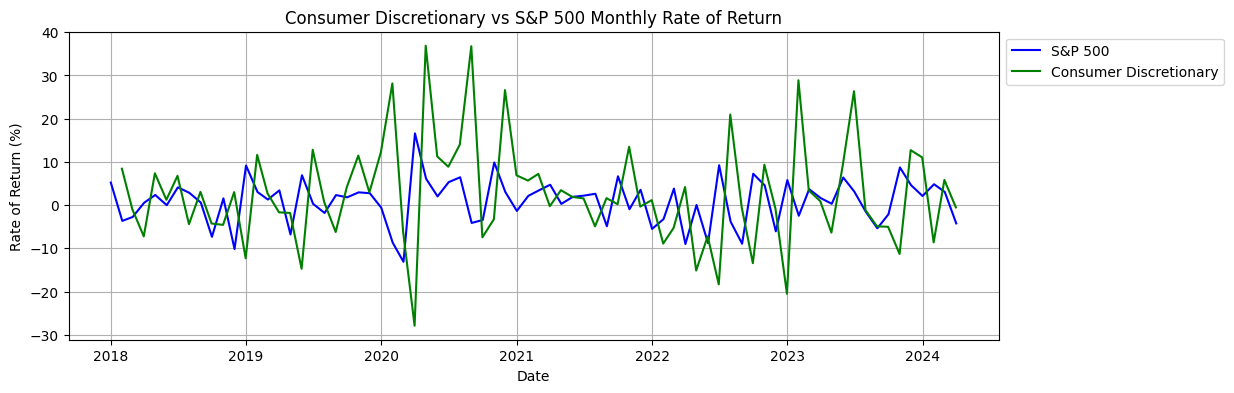

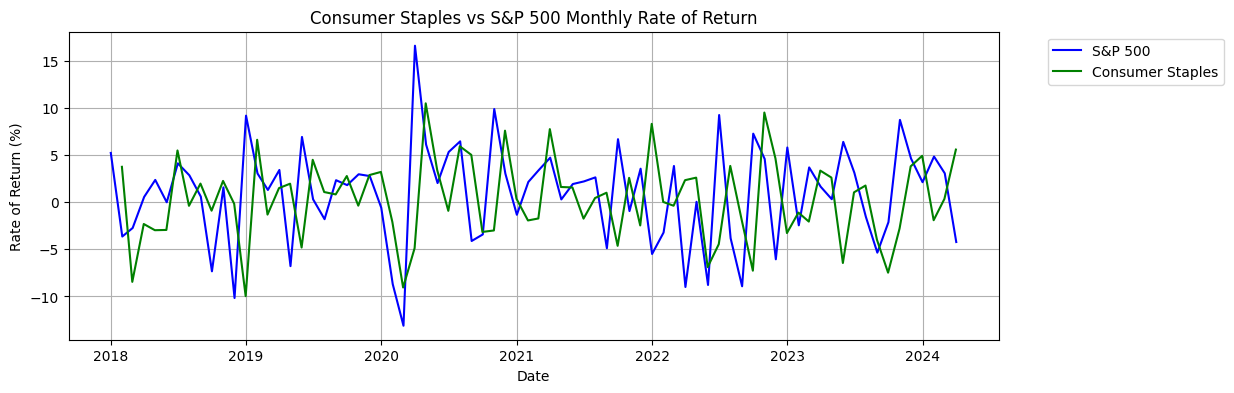

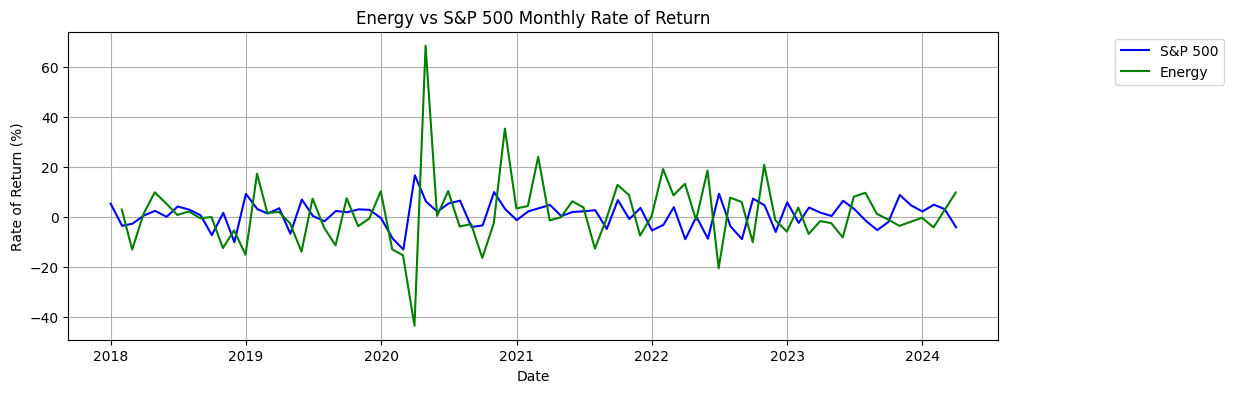

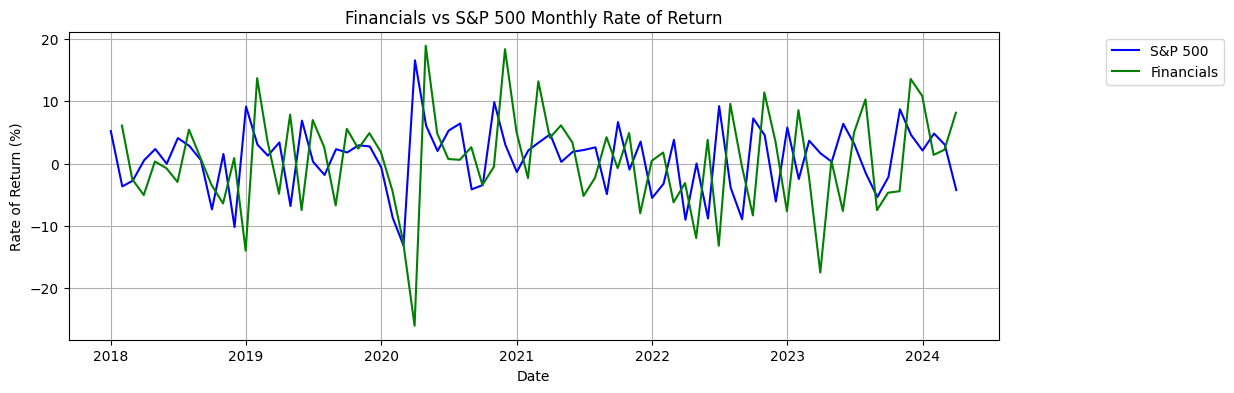

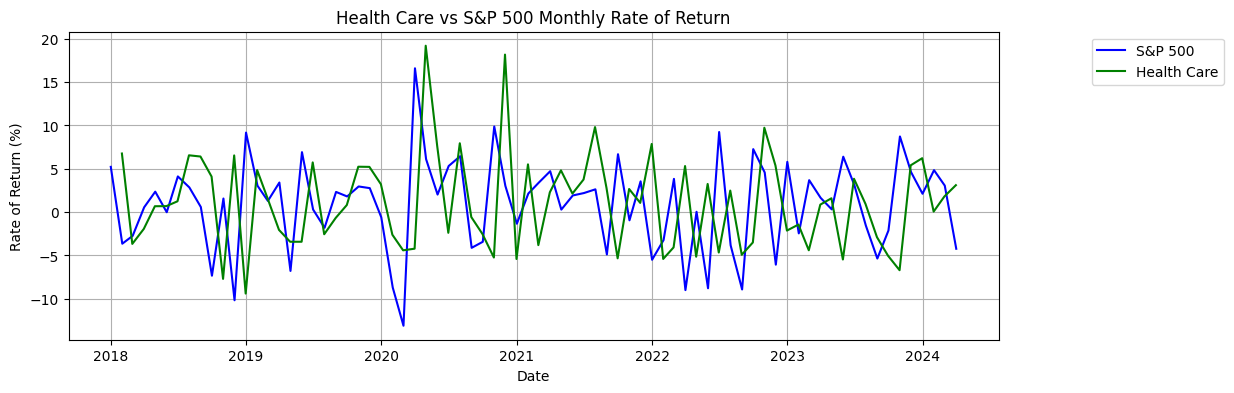

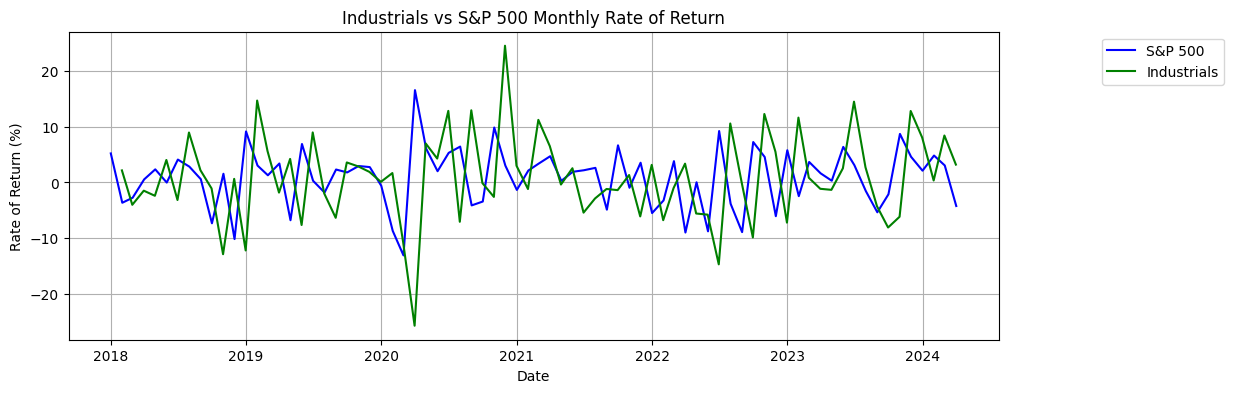

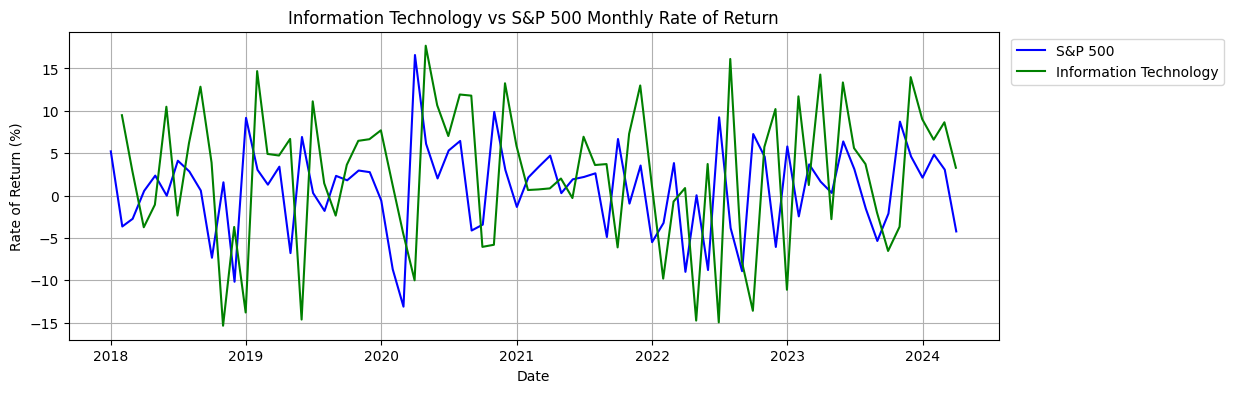

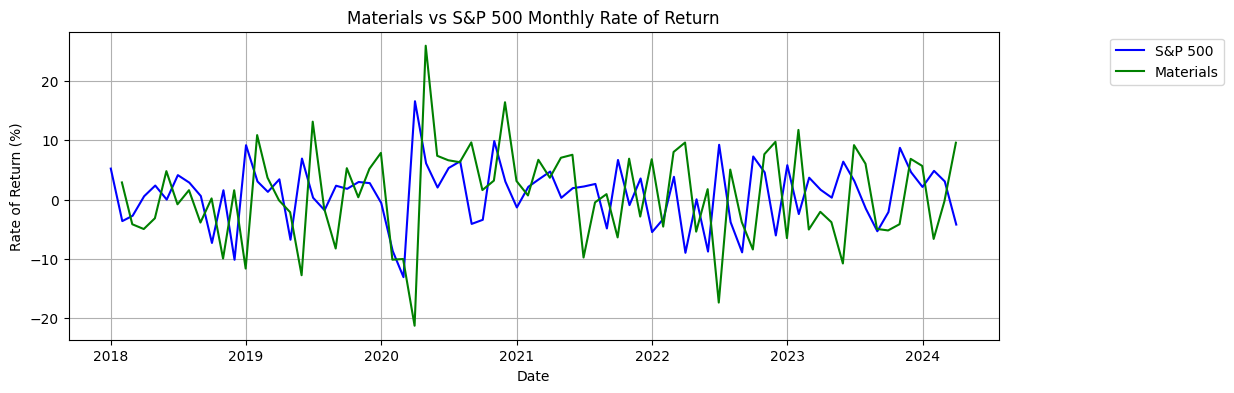

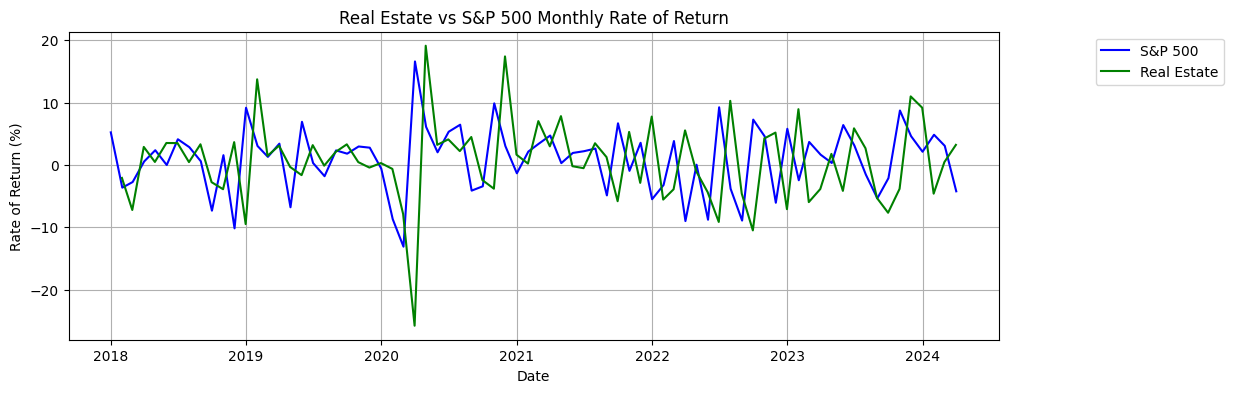

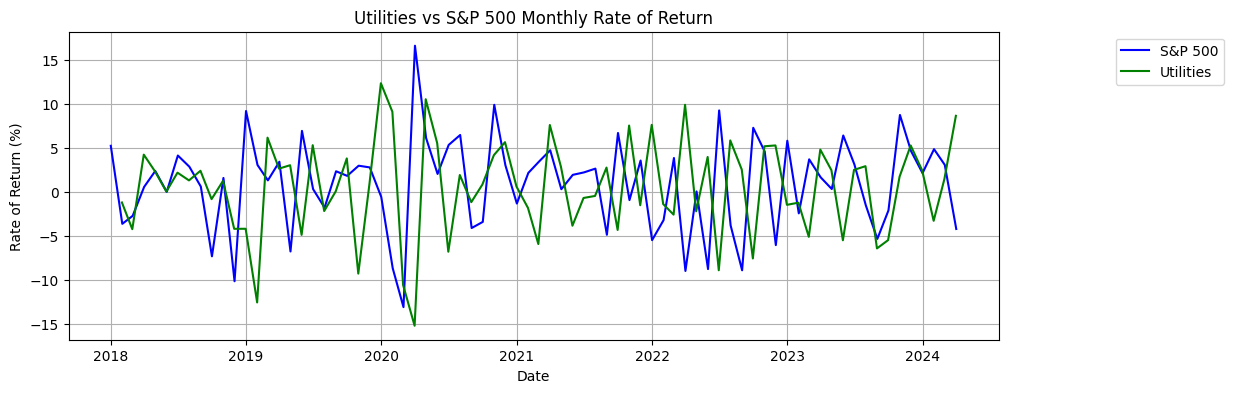

In [32]:
for sector in sector_data.columns:
    plt.figure(figsize=(12, 4))

    plt.plot(monthly_RoR['Date'], monthly_RoR['Monthly RoR (%)'], label='S&P 500', color='blue')
    plt.plot(sector_data.index, sector_data[sector], label=sector, color='green')
    plt.title(f'{sector} vs S&P 500 Monthly Rate of Return')
    plt.xlabel('Date')
    plt.ylabel('Rate of Return (%)')
    plt.legend(bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.show()

Our ultimate goal is to learn if any of our variables can be used as proxies for predicting future unemployment rates so now let's plot some data and see if there is relationship between our two GDP values and unemployment rate here.

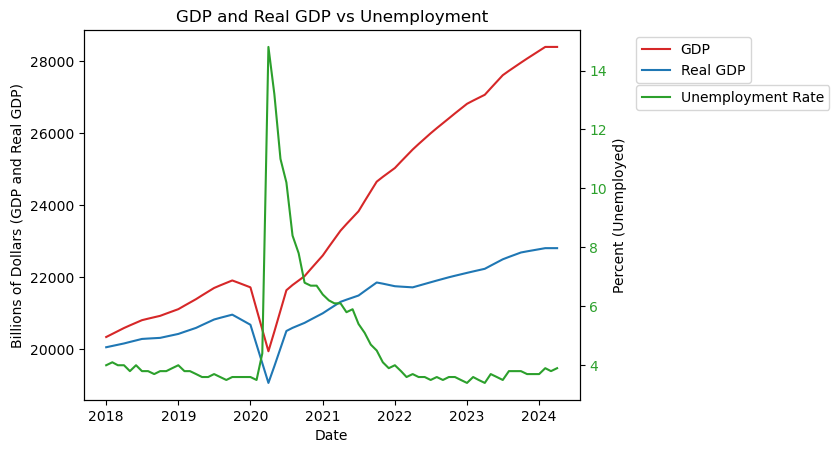

In [ ]:
# GDP + Real GDP + Unemployment Rate Across Time

fig, ax1 = plt.subplots()

# Plot GDPs
ax1.set_xlabel('Date')
ax1.set_ylabel('Billions of Dollars (GDP and Real GDP)')
ax1.plot(main_df['DATE'], main_df['GDP'], color='tab:red', label='GDP')
ax1.plot(main_df['DATE'], main_df['real_GDP'], color='tab:blue', label='Real GDP')

ax2 = ax1.twinx()

# Plot Unemployment Rate
ax2.set_ylabel('Percent (Unemployed)')
ax2.plot(main_df['DATE'], main_df['UNRATE'], color='tab:green', label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor='tab:green')

ax1.legend(bbox_to_anchor=(1.10, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.10, 0.87), loc='upper left')

plt.title('GDP and Real GDP vs Unemployment')

# fig.tight_layout()
plt.show()

On our first look at this graph, we see that both GDP and Real GDP appear to share an inverse relationship with unemployment rate meaning as our GDPs increase, unemployment rate decreases and vice versa. Now let's take a closer examination of the time frames that our graph covers.

<b>2018 - 2020</b>: This time frame represents the period leading up to the COVID-19 pandemic. Since GDP is slowly rising and unemployment rates are staying low, we can use this as our benchmark for future changes as we don't see any major fluctuations at this point in time except the sharp dip at the edge of 2019 that is reflective of the first emergence of COVID-19 in December 2019.

<b>2020 - 2021</b>: Beginning with the sharp dip, we see that at the peak of the COVID-19 pandemic, our GDPs sharply decline and correspondingly unemployment skyrockets as in person jobs are eliminated and remote work infrastructure isn't really established yet. Now as we proceed past the peak, we see that GDP begins recovering and unemployment reacts inversely as it begins to decrease. This makes sense because around this time period, society as a whole began adapting to COVID-19. We had the first round of vaccines, raised standards for cleanliness, made mask culture the norm, introduced remote work as well as infrastructure for return to work, etc.

Although this response might not necessarily extrapolate directly to unemployment across all types of crises, it does give us an idea of how the economy and job market responds to times of a pandemic. For future explorations outside the scope of this tutorial, if we wanted to predict unemployment during different types of crises, it would be helpful to gather more data points for that, including wars, natural disasters, other health pandemics, etcetera and across a greater length of time but in our case this suffices as we seek to forecast unemployment for the foreseeable future in times of norm.

<b>2021 - 2024</b>: Following the height of the pandemic, we see a period of mass economic growth that far exceeds that of the pre-pandemic. Correspondingly, we observe unemployment fall back down to its pre-pandemic levels.

The main takeaway here is that our GDP values are a good indicator of unemployment as their rises and falls correspond to the falls and rises of our unemployment rates respectively indicating an inverse relationship between the two.

## Model: Analysis, Hypothesis Testing, & ML

Dependent Variable: Unemployment Rate

Independent Variables:
- Interest Rate (Federal Funds Effective Rate)
- Inflation Rate (Consumer Price Index)
- SP500 (Closing Price EMA)
- GDP (can also sub in real_GDP to see if that makes the ML model more accurate)
- Rate of Return

TODO

Intro here...

Libraries used and links...

Talk about why we ended up choosing those independent variables for our ML model given the insights we gained from our analysis...

In [ ]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import sys
from io import StringIO

In [ ]:
# Elsa Model

In [ ]:
test_set = main_df.head(5)
test_set

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume,Close_EMA2
0,2018-01-01,4.0,1.41,4.170000,20328.553000,20044.077000,2683.73,2823.81,77318690000,2823.810000
1,2018-02-01,4.1,1.42,2.013279,20414.521451,20080.322813,2816.45,2713.83,79933970000,2816.714516
2,2018-03-01,4.0,1.51,1.961900,20492.170374,20113.060967,2715.22,2640.87,76803890000,2805.369709
3,2018-04-01,4.0,1.69,2.932009,20578.138824,20149.306780,2633.45,2648.05,70194700000,2795.220050
4,2018-05-01,3.8,1.70,2.981833,20651.939609,20191.457957,2642.96,2705.27,76011820000,2789.416821


In [ ]:
train_set = main_df.iloc[5:]
train_set

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume,Close_EMA2
5,2018-06-01,4.0,1.82,2.632118,20725.334804,20233.805978,2718.70,2718.37,77891360000,2784.833155
6,2018-07-01,3.8,1.91,2.111494,20796.362413,20274.787935,2704.95,2816.29,64898300000,2786.862629
7,2018-08-01,3.8,1.91,2.296711,20838.442333,20285.727333,2821.17,2901.52,69523070000,2794.259879
8,2018-09-01,3.7,1.95,2.333723,20878.154667,20295.300667,2896.96,2913.98,63031510000,2801.983758
9,2018-10-01,3.8,2.19,2.606263,20916.585957,20304.565183,2926.29,2711.74,91930980000,2796.161580
...,...,...,...,...,...,...,...,...,...,...
71,2023-12-01,3.7,5.33,4.160125,28171.809828,22738.032108,4559.43,4769.83,81530670000,4165.258574
72,2024-01-01,3.7,5.33,6.542477,28280.976495,22767.902441,4745.20,4845.65,81737880000,4209.154795
73,2024-02-01,3.9,5.33,4.558160,28390.143161,22797.772774,4861.11,5096.27,82066930000,4266.388034
74,2024-03-01,3.8,5.33,4.327346,28390.143161,22797.772774,5098.51,5254.35,86299510000,4330.127516


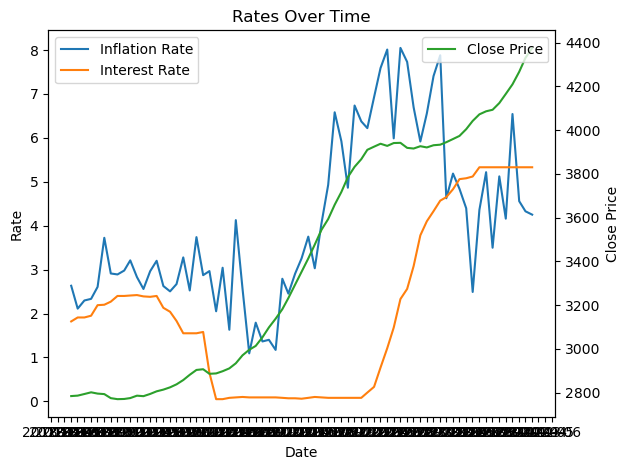

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(train_set['DATE'], train_set['inflation_rate'], label='Inflation Rate', color='tab:blue')
ax1.plot(train_set['DATE'], train_set['interest_rate'], label='Interest Rate', color='tab:orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rate')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(train_set['DATE'], train_set['Close_EMA2'], label='Close Price', color='tab:green')
ax2.set_ylabel('Close Price')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(MonthLocator(bymonthday=-1))
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.title('Rates Over Time')
plt.tight_layout()
plt.show()

### CORRELATION MATRIX & MODEL COMAPRISON STUDY

In [ ]:
features = main_df[['inflation_rate', 'interest_rate', 'Close_EMA2']]
target = main_df['UNRATE']

In [ ]:
split_ratio = 0.1
split_index = int(len(dataframe_all_rates) * split_ratio)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = target[:split_index], target[split_index:]
dates_test = dataframe_all_rates['DATE'][split_index:]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
len(main_df)

76

                inflation_rate  interest_rate  Close_EMA2    UNRATE
inflation_rate        1.000000       0.268409    0.730111 -0.369266
interest_rate         0.268409       1.000000    0.526266 -0.479307
Close_EMA2            0.730111       0.526266    1.000000 -0.282161
UNRATE               -0.369266      -0.479307   -0.282161  1.000000


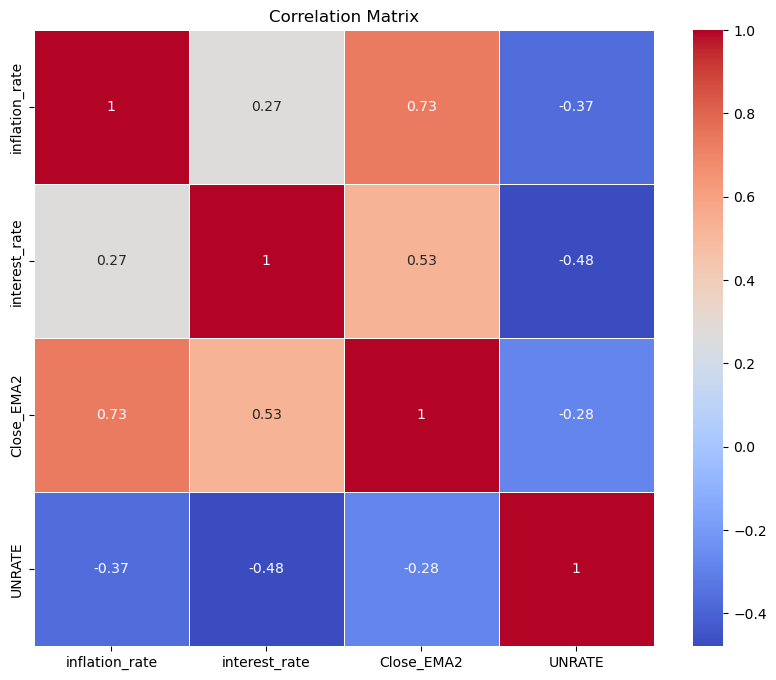

In [ ]:
features = dataframe_all_rates[['inflation_rate', 'interest_rate', 'Close_EMA2']]
target = dataframe_all_rates['UNRATE']

data = pd.concat([features, target], axis=1)

correlation_matrix = data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### SCATTER PLOTS of Unemployment Rate by FEATURE

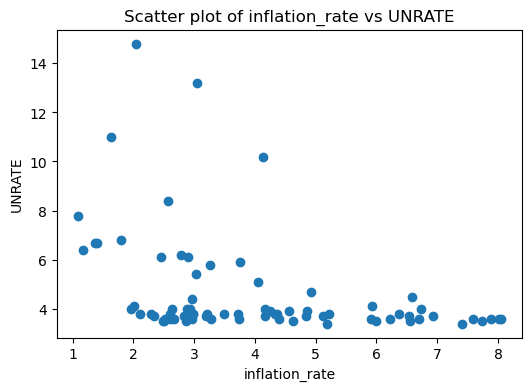

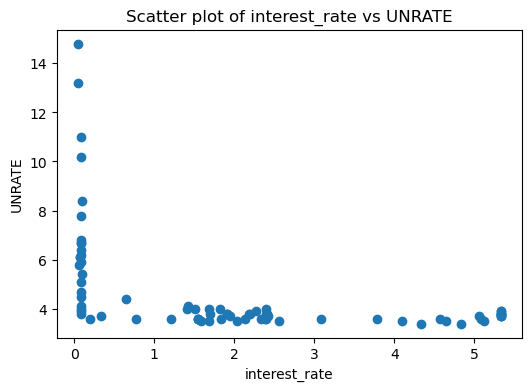

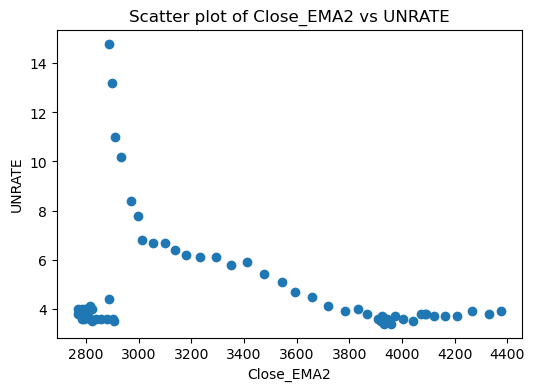

In [ ]:
for column in features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[column], data['UNRATE'])
    plt.xlabel(column)
    plt.ylabel('UNRATE')
    plt.title(f'Scatter plot of {column} vs UNRATE')
    plt.show()

SVM MSE: 3.9249288031999865, R^2: 0.2972219953652879
Linear Regression MSE: 4.189882874344121, R^2: 0.24978065240724323


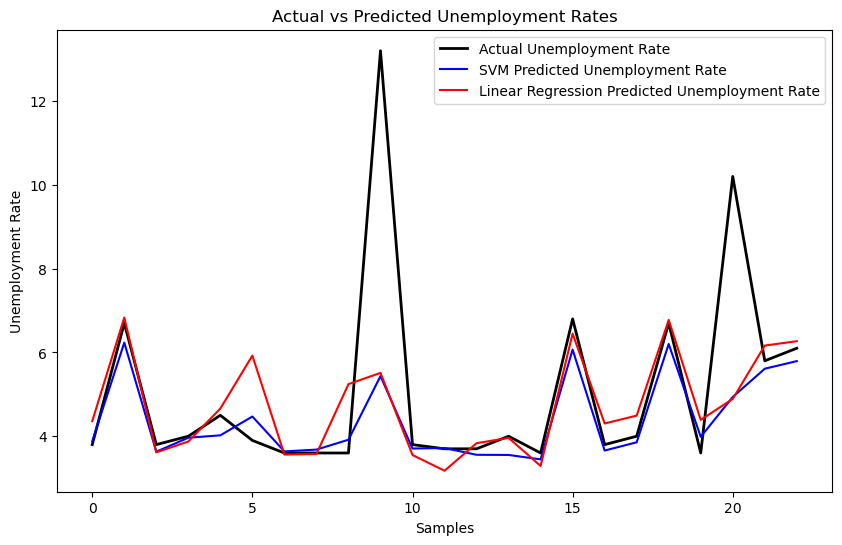

In [ ]:
# Define features and target
features = main_df[['inflation_rate', 'interest_rate', 'Close_EMA2']]
target = main_df['UNRATE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Model
svm_model = SVR(kernel='rbf', gamma='auto', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_svm = r2_score(y_test, y_pred_svm)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"SVM MSE: {mse_svm}, R^2: {r2_svm}")
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Unemployment Rate', color='black', linewidth=2)
plt.plot(y_pred_svm, label='SVM Predicted Unemployment Rate', color='blue')
plt.plot(y_pred_lr, label='Linear Regression Predicted Unemployment Rate', color='red')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rates')
plt.show()

In [ ]:
# Nathan Model

### Prepare Data for ML

In [ ]:
main_df

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume,Close_EMA2
0,2018-01-01,4.0,1.41,4.170000,20328.553000,20044.077000,2683.73,2823.81,77318690000,2823.810000
1,2018-02-01,4.1,1.42,2.013279,20414.521451,20080.322813,2816.45,2713.83,79933970000,2816.714516
2,2018-03-01,4.0,1.51,1.961900,20492.170374,20113.060967,2715.22,2640.87,76803890000,2805.369709
3,2018-04-01,4.0,1.69,2.932009,20578.138824,20149.306780,2633.45,2648.05,70194700000,2795.220050
4,2018-05-01,3.8,1.70,2.981833,20651.939609,20191.457957,2642.96,2705.27,76011820000,2789.416821
...,...,...,...,...,...,...,...,...,...,...
71,2023-12-01,3.7,5.33,4.160125,28171.809828,22738.032108,4559.43,4769.83,81530670000,4165.258574
72,2024-01-01,3.7,5.33,6.542477,28280.976495,22767.902441,4745.20,4845.65,81737880000,4209.154795
73,2024-02-01,3.9,5.33,4.558160,28390.143161,22797.772774,4861.11,5096.27,82066930000,4266.388034
74,2024-03-01,3.8,5.33,4.327346,28390.143161,22797.772774,5098.51,5254.35,86299510000,4330.127516


In [ ]:
feature_rates = main_df[['inflation_rate', 'interest_rate', 'Close_EMA2']]
df_unemp = main_df['UNRATE']

In [ ]:
# Splitting Testing and Training datasets
# We can use the last 3 months that we didn't consider (2024-02-01, 2024-03-01, 2024-04-01) as testing sets
train_X, test_X, train_y, test_y = train_test_split(feature_rates, df_unemp, test_size=0.20, random_state=42)

### Regression

In [ ]:
# Normalize the features: Inflation rate, Federal interest rate, Closing EMA
scaler = StandardScaler()
train_X_norm = scaler.fit_transform(train_X)
test_X_norm = scaler.transform(test_X)

### Predictions

In [ ]:
model = LinearRegression()
model.fit(train_X_norm, train_y)
prediction = model.predict(test_X_norm)

In [ ]:
print('Intercept:', model.intercept_)

print('Slope 1:', model.coef_[0])
print('Slope 2:', model.coef_[1])
print('Slope 3:', model.coef_[2])

Intercept: 4.636666666666667
Slope 1: -1.0153419043090686
Slope 2: -1.1837228276362364
Slope 3: 0.8598902527473047


### Gradient Descent

In [ ]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

T = 1000
sgd = SGDRegressor(verbose=1, loss='squared_error', max_iter=T, penalty=None, eta0=0.001)
#sgd_reg = SGDRegressor(verbose=1, loss='squared_error', max_iter=500, tol=1e-4, penalty=None, eta0=0.05)
sgd.fit(train_X_norm, train_y.to_numpy().ravel())

train_y_pred = sgd.predict(train_X_norm)
test_y_pred = sgd.predict(test_X_norm)

# Gets the loss values from the training
sys.stdout = old_stdout
loss = mystdout.getvalue()
loss_list = []

for line in loss.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

### MSE

In [ ]:
np_test_y = test_y.to_numpy()
MSE = np.square(np.subtract(np_test_y,test_y_pred)).mean()
print('MSE:', MSE)

MSE: 4.448315169263172


### Predictions of Unemployment Rate in February, March, April 2024

In [ ]:
# Combines the data for all features up in the time period up to April 2024 into one dataframe
merge_1 = pd.merge(unrate_df, interest_rate_df, on='DATE', how='outer')
merge_2 = pd.merge(monthly_gdps_df, sp500_stocks_df, on='DATE', how='outer')
merge_3 = pd.merge(inflation_rate_df, merge_2, on='DATE', how='outer')
feb_to_apr_df = pd.merge(merge_1, merge_3, on='DATE', how='outer')

# Cuts the dataframe to only February to April 2024
feb_to_apr_df = feb_to_apr_df[feb_to_apr_df['DATE'] >= '2024-02-01']
feb_to_apr_df.head()

,DATE,UNRATE,interest_rate,inflation_rate,GDP,real_GDP,Open,Close,Volume,Close_EMA2
73,2024-02-01,3.9,5.33,4.558160,28390.143161,22797.772774,4861.11,5096.27,82066930000,4266.388034
74,2024-03-01,3.8,5.33,4.327346,28390.143161,22797.772774,5098.51,5254.35,86299510000,4330.127516
75,2024-04-01,3.9,5.33,4.251323,28390.143161,22797.772774,5257.97,5035.69,81747170000,4375.647676


In [ ]:
# This is actual unemployment to compare to
feb_to_apr_unemp = feb_to_apr_df[['UNRATE']]
# Features used to predict unemployment in February, March, and April
feb_to_apr_features = feb_to_apr_df[['inflation_rate', 'interest_rate', 'Close_EMA2']]
# Normalize it
feb_to_apr_norm = scaler.transform(feb_to_apr_features)

In [ ]:
feb_to_apr_features

,inflation_rate,interest_rate,Close_EMA2
73,4.558160,5.33,4266.388034
74,4.327346,5.33,4330.127516
75,4.251323,5.33,4375.647676


In [ ]:
# Calculates the prediction
feb_to_apr_pred = sgd.predict(feb_to_apr_norm)

print('Feb 2024 actual:', feb_to_apr_unemp.iloc[0].values)
print('Mar 2024 actual:', feb_to_apr_unemp.iloc[1].values)
print('Apr 2024 actual:', feb_to_apr_unemp.iloc[2].values)

print('Feb 2024 prediction:', feb_to_apr_pred[0])
print('Mar 2024 prediction:', feb_to_apr_pred[1])
print('Apr 2024 prediction:', feb_to_apr_pred[2])

Feb 2024 actual: [3.9]
Mar 2024 actual: [3.8]
Apr 2024 actual: [3.9]
Feb 2024 prediction: 2.8246340743028395
Mar 2024 prediction: 2.9024137499040377
Apr 2024 prediction: 2.9339937106910154


### Loss

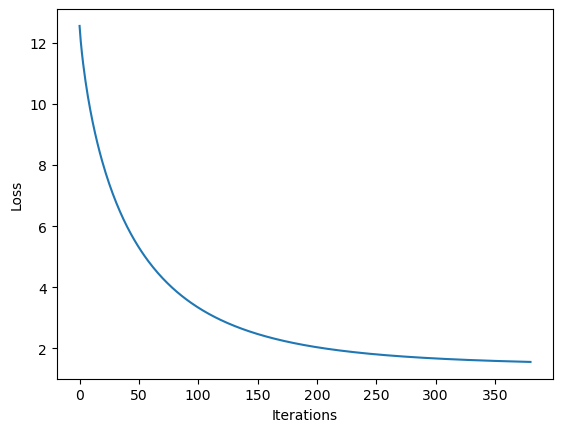

<Figure size 500x1000 with 0 Axes>

In [ ]:
# Displays the loss from squared error formula
plt.plot(range(len(loss_list)),loss_list)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.figure(figsize=(5,10))
plt.show()

## Interpretation: Insight & Policy Decision

Closing thoughts here...

What did we learn? Did we achieve our goal? Things to think about as you go forward in your data science journey... etc...

In [ ]:
# Collaborative Conclusion